<IPython.core.display.Javascript object>


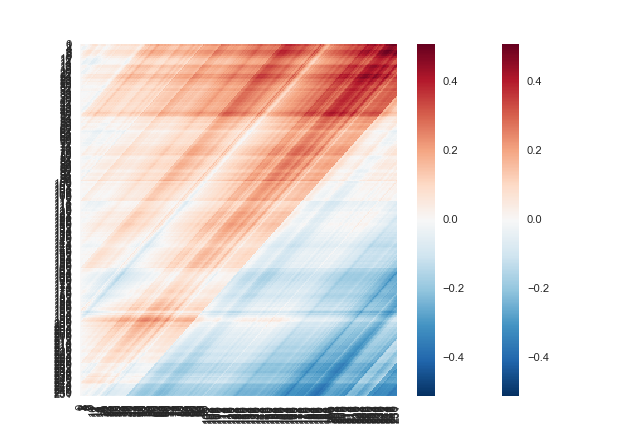

In [115]:
%matplotlib nbagg
import matplotlib.pyplot as plt
import numpy as np
column_labels = list('ABCD')
row_labels = list('WXYZ')
data = np.random.rand(4,4)
fig, ax = plt.subplots()
heatmap = ax.pcolor(data)

# put the major ticks at the middle of each cell, notice "reverse" use of dimension
ax.set_yticks(np.arange(data.shape[0])+0.5, minor=False)
ax.set_xticks(np.arange(data.shape[1])+0.5, minor=False)


ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(column_labels, minor=False)
plt.show()

In [186]:
import datetime as dt
import util
import pandas as pd
import seaborn as sns; sns.set()

sd = dt.date(2005,1,1)
ed = dt.datetime(2017,12,31)
dates = pd.date_range(sd, ed)
syms = ['GOOG','AAPL','TSLA','MSFT','AMD','HPQ','FNCL']
util.update_data(syms)
df = util.get_data(syms,dates)

In [ ]:
df.head()

In [156]:
def profitmap(year,df):
    A=np.zeros( (252,252) )
    for x in range(0,252):
        for y in range(0,252):
            sd = dt.date(year,1,1)+dt.timedelta(x)
            ed = dt.date(year,1,1)+dt.timedelta(y)
            if y<x:
                ed = dt.date(year,1,1)+dt.timedelta(y+365)
            if sd in df.index and ed in df.index:
                A[x][y]=(df.loc[ed]/df.loc[sd]) -1
    return A


def profitmap2(year,df):
    sy = dt.date(year,1,1)
    data = df[sy:]
    A=np.zeros( (252,252))
    for x in range(0,252):
        for y in range(0,252):
            si = x
            ei = si + y
            A[x,y]=(data.ix[ei]/data.ix[si])
    return A

In [26]:

import time

start = time.time()
A= profitmap2(2015,df['MSFT'])
end = time.time()

print(end - start)

3.0


In [111]:
year = 2014
sy = dt.date(year,1,1)
data = df[sy:]
print data.ix[244]

SPY     197.232657
GOOG    516.352313
AAPL    107.051107
TSLA    219.289993
MSFT     44.885648
AMD       2.570000
HPQ      16.861465
WMT      80.518029
Name: 2014-12-19 00:00:00, dtype: float64


In [200]:
df['FNCL'].index[2500]

Timestamp('2014-12-08 00:00:00')

In [243]:
goog_profitmap = lambda x: profitmap2(x,df['MSFT'])
maps = map(goog_profitmap,range(2005,2015))
A=sum(np.log(maps))
A=A/len(maps)
A= (10 ** A) -1 


<IPython.core.display.Javascript object>


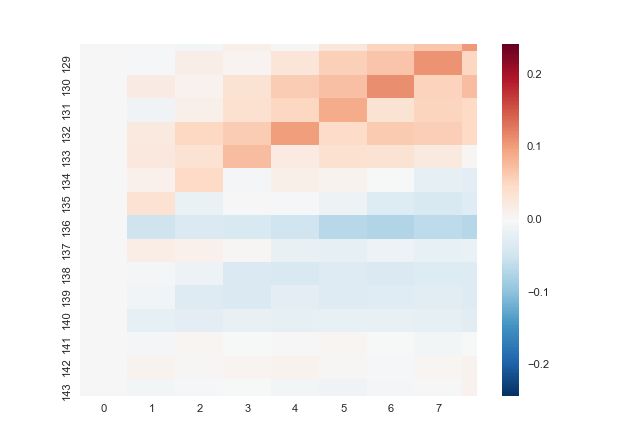

In [247]:
B=A[:,:100]
fig, ax = plt.subplots()
ax = sns.heatmap(B)

In [248]:
def examine_year(year,sym,si,ei):
    sy = dt.date(year,1,1)   
    data = df[sym][sy:]
    a= data.ix[si]
    b= data.ix[si + ei]
    print a,b, b/a, ((b/a) -1) * 100 
    print data.index[si],data.index[si+ei]

eyear = lambda year: examine_year(year,'MSFT',132,4)
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

interact(eyear, year=(2005,2017));

22.727081 23.503712 1.03417205228 3.41720522754
2011-07-13 00:00:00 2011-07-19 00:00:00


In [223]:
a=enumerate(df['AAPL'][dt.date(2017,1,1):].index)
[x for x in a]

[(0, Timestamp('2017-01-03 00:00:00')),
 (1, Timestamp('2017-01-04 00:00:00')),
 (2, Timestamp('2017-01-05 00:00:00')),
 (3, Timestamp('2017-01-06 00:00:00')),
 (4, Timestamp('2017-01-09 00:00:00')),
 (5, Timestamp('2017-01-10 00:00:00')),
 (6, Timestamp('2017-01-11 00:00:00')),
 (7, Timestamp('2017-01-12 00:00:00')),
 (8, Timestamp('2017-01-13 00:00:00')),
 (9, Timestamp('2017-01-17 00:00:00')),
 (10, Timestamp('2017-01-18 00:00:00')),
 (11, Timestamp('2017-01-19 00:00:00')),
 (12, Timestamp('2017-01-20 00:00:00')),
 (13, Timestamp('2017-01-23 00:00:00')),
 (14, Timestamp('2017-01-24 00:00:00')),
 (15, Timestamp('2017-01-25 00:00:00')),
 (16, Timestamp('2017-01-26 00:00:00')),
 (17, Timestamp('2017-01-27 00:00:00')),
 (18, Timestamp('2017-01-30 00:00:00')),
 (19, Timestamp('2017-01-31 00:00:00')),
 (20, Timestamp('2017-02-01 00:00:00')),
 (21, Timestamp('2017-02-02 00:00:00')),
 (22, Timestamp('2017-02-03 00:00:00')),
 (23, Timestamp('2017-02-06 00:00:00')),
 (24, Timestamp('2017-02-0

In [227]:
np.argmax(A[84, ])
A[84,173]

0.69428809102165778